In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv("austin_weather.csv")
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [13]:
print(df.columns)

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1319 non-null   object 
 6   DewPointLowF                1319 non-null   object 
 7   HumidityHighPercent         1319 non-null   object 
 8   HumidityAvgPercent          1319 non-null   object 
 9   HumidityLowPercent          1319 non-null   object 
 10  SeaLevelPressureHighInches  1319 non-null   object 
 11  SeaLevelPressureAvgInches   1319 non-null   object 
 12  SeaLevelPressureLowInches   1319 non-null   object 
 13  VisibilityHighMiles         1319 

In [15]:
# Replace 'T' and '-' with 0 (or use np.nan depending on your interpretation)
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].replace(['T', '-'], 0).astype(float)

In [12]:
# Replace 'T' and '-' with 0 (or use np.nan depending on your interpretation)
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].replace(['T', '-'], 0).astype(float)

# Check for nulls
df.isnull().sum()


Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [16]:
# Check for nulls
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [17]:
df = df.drop(['Events', 'Date'], axis=1)

In [18]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [19]:
X = df.drop(['PrecipitationSumInches'], axis=1)
y = df['PrecipitationSumInches']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.22106091287108287
RMSE: 0.2643907525728473


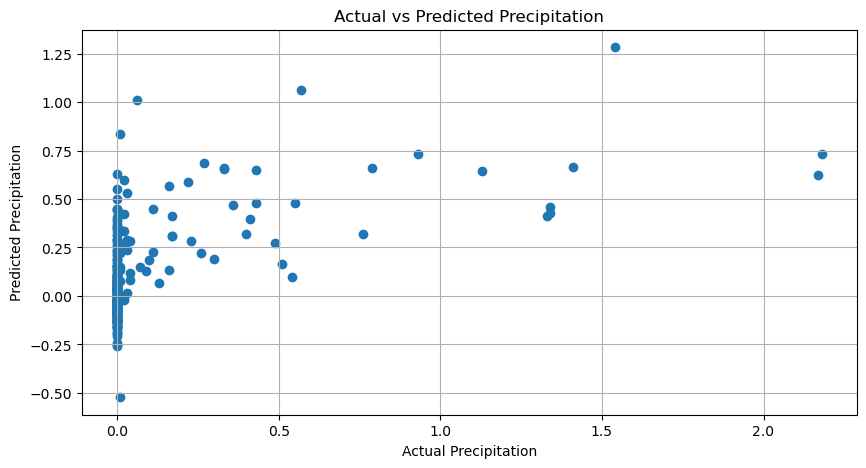

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.grid(True)
plt.show()

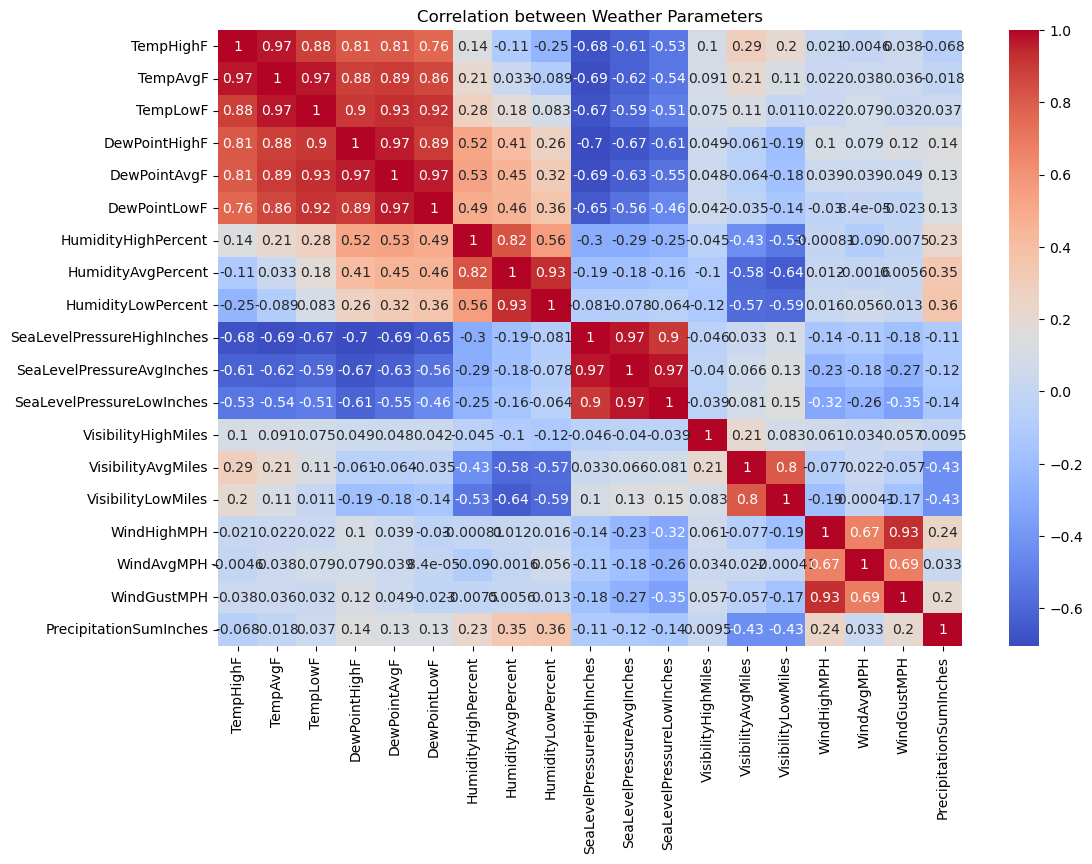

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Weather Parameters")
plt.show()